<a href="https://colab.research.google.com/github/tejassavalia7/Psych640/blob/master/p_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


# Define A Population with:
##  Mean = 0, 
## Standard Deviation = 1, 
## The total number of items in a population: 10000

In [0]:
mu, sigma = 0, 1
num_population = 10000
data = np.random.normal(mu, sigma, num_population)

# Plot Population Density

(array([0.00290788, 0.01772425, 0.08058994, 0.21573732, 0.36791659,
        0.36763965, 0.2243225 , 0.08432864, 0.02021672, 0.0033233 ]),
 array([-3.63340298, -2.91122843, -2.18905388, -1.46687933, -0.74470478,
        -0.02253023,  0.69964431,  1.42181886,  2.14399341,  2.86616796,
         3.58834251]),
 <a list of 10 Patch objects>)

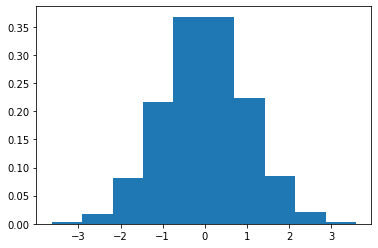

In [0]:
plt.hist(data, density= True)

# Create a Sampling Distribution of means with variable Sample sizes. 
## A sampling distribution of means is created as follows
1. For a sample size of, say, 20, take a random sample of 20 items from the population.
2. Calculate the mean of that sample.
3. Repeat steps 1 and 2 for lots of samples (In the code below, I've taken 100 such samples)
4. Plot the means of those samples. (In the code below, there are 100 means)

In [0]:
def plot_sampling_distribution(sample_size, color_shade = 0.5):
  num_samples = 100
  sample_means = np.zeros((num_samples))
  for sample in range(num_samples):
    sample_means[sample] = np.mean(np.random.choice(data, sample_size))
  plt.hist(data, alpha = 0.5, density=True)
  plt.hist(sample_means, alpha = color_shade, density=True)
  plt.xlim((-4, 4))
  text = "Sample Size: " + str(sample_size)
  plt.title('Sampling Distribution')
  #plt.text(x = 2, y = 1, s = text)

# Adjust the slider below to play with sample sizes

In [0]:
interact(plot_sampling_distribution, sample_size=10, color_shade = 0.5, min = 2, max = 20)

interactive(children=(IntSlider(value=10, description='sample_size', max=30, min=-10), FloatSlider(value=0.5, …

<function __main__.plot_sampling_distribution>

# p-values
1. Suppose you're told that mean of a population is 0. But your intuition says that it is not. Your alternate hypothesis is that the actual mean is not equal to 0.
2. Suppose you're right in your intuition. The actual population mean is 0.5 (standard deviation 1).
3. Now you draw samples from this actual population and take a mean of these samples. 
4. How does this mean compare to the sampling distribution of the null hypothesis?

In [0]:
alternate_hypothesis = 0.5
sample_size = 20
#Normally distributed sample of size 20. Mean 0.5, SD 1. This is a sample from the real, 'correct' world.
data_alternate = np.random.normal(0.5, 1, sample_size)

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.10658007, -0.00658007,  0.09341993,  0.19341993,  0.29341993,
         0.39341993,  0.49341993,  0.59341993,  0.69341993,  0.79341993,
         0.89341993]),
 <a list of 10 Patch objects>)

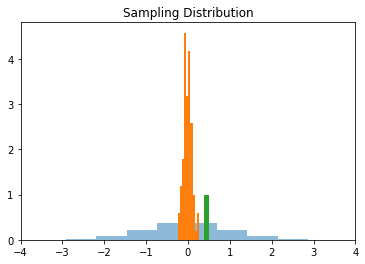

In [0]:
plot_sampling_distribution(sample_size = 100, color_shade= 1)
plt.hist(np.mean(data_alternate))